Epoch 1/5
1875/1875 [==============================] - 30s 14ms/step - loss: 0.5988 - accuracy: 0.8194
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1192 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0842 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0681 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0610 - accuracy: 0.9816


C:\Users\Aromal\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



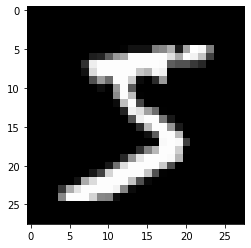

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten, Dropout
from tensorflow.keras.activations import relu,sigmoid
 
(x_train, y_train), (x_test, y_test)=mnist.load_data( )
x_train=(x_train/255).reshape((-1,28,28,1))
x_test=(x_test/255).reshape((-1,28,28,1))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
 
m=Sequential()
m.add(Conv2D(8,(3,3),activation='relu',input_shape=(28,28,1)))
m.add(Dropout(0.2))
m.add(MaxPooling2D())
m.add(Conv2D(16,(3,3),activation='relu'))
m.add(Dropout(0.3))
m.add(MaxPooling2D())
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.compile('adam','categorical_crossentropy',metrics=['accuracy'])
m.fit(x_train,y_train,epochs=5)

(uy,hfy), (__, y_test)=mnist.load_data( )
e=m.predict_classes(x_test)
e.shape,y_test.shape

from sklearn.metrics import classification_report
print(classification_report(y_test,e))
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')


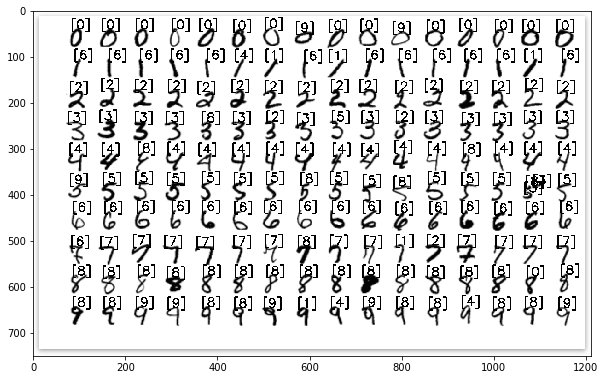

In [ ]:

a=plt.imread('C:\\Users\\Aromal\\Desktop\\num.png',0)
a=cv2.cvtColor(a,cv2.COLOR_RGB2GRAY)
plt.imshow(a,cmap='gray')

cc=a.copy()
_,a1=cv2.threshold(a,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
v=cv2.findContours(a1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]
sca=min(a.shape)//50

for c in v:
    s=cv2.boundingRect(c)
    #a1=cv2.rectangle(a1,(s[0],s[1]),(s[0]+s[2],s[1]+s[3]),color=(0,0,0),thickness=3)
    ma=max(s[3],s[2])
    re=cv2.resize(a1[s[1]-sca:s[1]+ma+sca,s[0]-sca:s[0]+ma+sca].copy(),(28,28))
    #plt.imshow(re)
    #plt.show()
    re=re.reshape((1,28,28,1))
    re=m.predict_classes(re)
    
    cc=cv2.putText(cc,str(re),(s[0],s[1]),cv2.FONT_HERSHEY_SIMPLEX,0.9,color=(0,0,0),thickness=2)
plt.figure(figsize=(10,7))
plt.imshow(cc,cmap='gray')

digits from captcha =  [3 4 5 6 2 7 8]


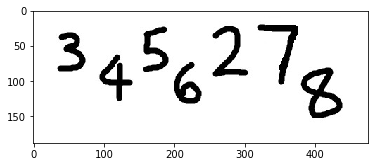

In [ ]:
a=plt.imread('C:\\Users\\Aromal\\Desktop\\captcha.jpg',0)
a=cv2.cvtColor(a,cv2.COLOR_RGB2GRAY)
plt.imshow(a,cmap='gray')

cc=a.copy()
_,a1=cv2.threshold(a,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
v=cv2.findContours(a1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]
sca=min(a.shape)//50

s=[]
resu=[]
for c in v:
    s.append(np.array(cv2.boundingRect(c)))
s=np.array(s)
rt=np.argsort(s[:,0])  
s=s[rt]
#print(s)
for c in s:
    #a1=cv2.rectangle(a1,(s[0],s[1]),(s[0]+s[2],s[1]+s[3]),color=(0,0,0),thickness=3)
    ma=max(c[3],c[2])
    re=cv2.resize(a1[c[1]-sca:c[1]+c[3]+sca,c[0]-sca:c[0]+c[2]+sca].copy(),(28,28))
    #plt.imshow(re)
    #plt.show()
    re=re.reshape((1,28,28,1))
    re=m.predict_classes(re)
    resu.append(re)
resu=np.array(resu).ravel()
print("digits from captcha = ",resu)
